
# Module 5 - pandas: data manipulation and analysis with dataframes
-----------------------------------------------------------------------------------------------------

<div class="alert alert-block alert-info">
<b>Note:</b> this notebook contains <b>Additional Theory</b> sections (in blue boxes, like this one) that will be skipped during the class due to time constraints. If you are going through this notebook on your own, feel free to
read these sections or skip them depending on your interest.
<div>

### Table of Content <a id='toc'></a>

[**Introduction**](#0)

[**Pandas data structures: DataFrame and Series**](#1)  
&nbsp;&nbsp;&nbsp;&nbsp;[Creating a new DataFrame](#2)  
&nbsp;&nbsp;&nbsp;&nbsp;[[Additional Theory] Creating a pandas Series](#3)  
&nbsp;&nbsp;&nbsp;&nbsp;[Micro Exercise 1 - Create a DataFrame](#4)  

[**Reading tabular data from files**](#5)  
&nbsp;&nbsp;&nbsp;&nbsp;[[Additional Theory] Reading input data with no header](#6)  
&nbsp;&nbsp;&nbsp;&nbsp;[Dropping rows with missing values (`NaN`)](#7)  

[**Writing files to disk**](#8)  
&nbsp;&nbsp;&nbsp;&nbsp;[Micro Exercise 2 - Read and write data frames](#9)  

[**Accessing, editing and adding columns and rows**](#10)  
&nbsp;&nbsp;&nbsp;&nbsp;[Accessing, editing and adding columns](#11)  
&nbsp;&nbsp;&nbsp;&nbsp;[Operations on columns](#12)  
&nbsp;&nbsp;&nbsp;&nbsp;[Accessing, editing and adding rows](#13)  
&nbsp;&nbsp;&nbsp;&nbsp;[[Additional Theory] Adding a Series as a row to a DataFrame with `pd.concat()`](#14)  

[**Deleting columns and rows**](#15)  
&nbsp;&nbsp;&nbsp;&nbsp;[Micro Exercise 3 - Editing a DataFrame](#16)

[**DataFrame subsetting: the `loc[]` and `iloc[]` indexers**](#17)  
&nbsp;&nbsp;&nbsp;&nbsp;[Conditional row selection](#18)  
&nbsp;&nbsp;&nbsp;&nbsp;[[Additional Theory] Mixed selection](#19)  
&nbsp;&nbsp;&nbsp;&nbsp;[Micro Exercise 3 - DataFrame selection](#20)  

[**[Additional Theory] Creating copies of a DataFrame**](#21)  

[**Summary statistics on DataFrame or Series**](#22)  
&nbsp;&nbsp;&nbsp;&nbsp;[Micro Exercise 5 - Summary statistics](#23)  
&nbsp;&nbsp;&nbsp;&nbsp;[[Additional Theory] Applying custom functions by rows or columns](#24)  
&nbsp;&nbsp;&nbsp;&nbsp;[[Additional Theory] Micro Exercise 6 - applying custom functions](#25)  

[**Grouping data by factor**](#26)  
&nbsp;&nbsp;&nbsp;&nbsp;[Micro Exercise 7 - Grouping data](#27)  

[**Exercises 5.1 - 5.3**](#28)

[**Additional Theory**](#29)  
&nbsp;&nbsp;&nbsp;&nbsp;[Selecting/Filtering dataframes](#31)  
&nbsp;&nbsp;&nbsp;&nbsp;[Sorting operations on dataframes](#32)  
&nbsp;&nbsp;&nbsp;&nbsp;[Extending a dataframe by adding new columns](#33)  
&nbsp;&nbsp;&nbsp;&nbsp;[Use of numpy functions with pandas dataframes](#34)  
&nbsp;&nbsp;&nbsp;&nbsp;[Merge and join DataFrames](#35)  
&nbsp;&nbsp;&nbsp;&nbsp;[Cross-tabulated tables](#36)  
&nbsp;&nbsp;&nbsp;&nbsp;[Plotting with pandas and matplotlib](#37)  

<br>
<br>

## Introduction <a id='0'></a>
-------------------

[Pandas](https://pandas.pydata.org/) is a library that provides easy-to-use data structures and data analysis tools.

The main appeal of pandas is its **DataFrame** structure, which emulates many of the convenient behavior and syntax of its eponym counterpart in the **R** language. In other words, pandas allows you to manipulate data tables in a very similar fashion as you would do in R.

By convention, `Pandas` is imported under the alias **`pd`** (because it's shorter):

In [ ]:
import pandas as pd

<br>
<br>

## Pandas data structures: DataFrame and Series <a id='1'></a>
--------------------------------------------------------------

The two main data structures in pandas are **DataFrame** and **Series**:

![image.png](img/pandas_dataframe_and_series.png)

* **`DataFrame`**:
  * **2-dimensional** data structure/table.
  * Row names are called the **index**. By default, the index is made of numerical values starting with 0.
  * **Size-mutable**: the number of rows/columns can be modified.
  * Supports **heterogeneously-typed** columns (not all values in a column must be of the same type).

<br>

* **`Series`**:
  * **1-dimensional** labelled array, i.e. a data vector with labelled values.
  * The labels are called the **index**.
  * Series are **generally** used to store **homogeneously-typed data** (i.e. values of the same type), 
    but having **heterogenous types is possible**.

As most python structure, `DataFrame` and `Series` use **zero-based indexing**: the position of the first row/column (or value in a Series) is position `0`.

**Each column of a `DataFrame` is a `Series`**, and selecting a single column of a `DataFrame` thus
returns a `Series`. Therefore both `DataFrame` and `Series` can be seen as containers: `DataFrame` is a container for `Series`, and `Series` is a container for individual values.

<br>

### Creating a new DataFrame <a id='2'></a>
To create a new pandas DataFrame, we pass a `dict` (dictionary) to **`pd.DataFrame()`**, where:

* The dictionary's **keys are column names**.
* The dictionary's **values are the values for the given column**. The values can be either:
    * A sequence - e.g. a `list` or a `tuple`.
    * A unique value - in which case all values in the column will be identical
      (see e.g. the "Survived" column in the example below).
  
By default, a numeric index is auto-generated with values starting at 0 (corresponding to row positions).  
A custom index can be set by adding the `index` argument when instantiating the DataFrame, or the default index can be replaced by a custom index after the DataFrame is created.

In [ ]:
import pandas as pd

df = pd.DataFrame(
    {
        "Name": ["Charles", "Florence", "Mary", "William", "Bridget"],
        "Gender": ("male", "female", "female", "male", "female"),
        "Age": [23, 38, 18, 28, 27],
        "Survived": 1
    }
)

# Note: evaluating a DataFrame object at the end of a jupyter cell will render it nicely in the notebook.
df

#### The basic characteristics of a `DataFrame` can be accessed through the following attributes:
* `df.columns`: **column names** (returned as `Index` object).
* `df.index`: **row names** (returned as `Index` or `RangeIndex` object).
* `df.shape`: returns a tuple with the **numbers of rows and columns**: `(row_count, col_count)`.

In [ ]:
# The "shape" attribute retruns a tuple with row and column count:
df.shape

**Example:** retrieve row/column count and names from a DataFrame.

In [ ]:
print("row count:", df.shape[0])
print("col count:", df.shape[1])

In [ ]:
print("column names:", list(df.columns))
print("row names   :", list(df.index))

<br>

Note: the `df.columns` and `df.index` attributes can also be used to **set new values** for column names and index labels.
```python
df.columns = ("NAME", "GENDER", "AGE", "SURVIVED")   # Change column names to upper case.
df.index = ("one", "two", "three", "four", "five")   # Change index values.
```

<br>

[Back to ToC](#toc)

<div class="alert alert-block alert-info">

### [Additional Theory] Creating a pandas Series <a id='3'></a>
To create a new pandas **Series**, we pass a sequence (e.g. list, tuple, dict, generator) to **`pd.Series()`**:
* The optional `name` argument allows to associate a "name" to the Series.
* As with `pd.DataFrame()`, an optional `index` argument can be passed (by default the index
  is set to numerical values starting from 0).
* Alternatively, a `dict` can be passed as input to `pd.Series()`, in which case the keys of the dictionary
  are used as index values, and the values as values for the Series.
  
The basic characteristics of a Series (here named `s`) are:
* Its **length**: retrieved with **`s.size`** or `len(s)`
* Its **name**: retrieved with **`s.name`**.

**Example:**
</div>

In [ ]:
passenger_class = pd.Series([2, 1, 3, 1, 3], name="Pclass")
passenger_class

<br>

<div class="alert alert-block alert-success">

### Micro Exercise 1 - Create a DataFrame<a id='4'></a>
* Create a new DataFrame named `df_size` with the following structure:

Name  | Height | Weight
---   | ----   | ----
Alice |  163   | 58
Bob   |  180   | 97
Jim   |  172   | 63
Zoe   |  173   | 60

* Print the number of rows and columns of the DataFrame.  
* Also print the DataFrame itself, to verify that its structure matches the one given above.

To make your life easier, you can copy/paste the values from here:
```python
name_values = ["Alice", "Bob", "Jim", "Zoe"]
height_values = [163, 180, 172, 173]
weight_values = [58, 97, 63, 60]
```

<div>

<br>
<br>

[Back to ToC](#toc)

## Reading tabular data from files <a id='5'></a>
------------------------------------------

In the previous section we have seen how to create a DataFrame from scratch. But very frequently our **data is already in a tabular format** in a file, and simply needs to be imported.

Pandas has a number of functions that will do just that: read a tabular data file from disk and import it as a DataFrame.  
Here are some of the most useful ones:

* **`pd.read_table()`**: import data from a tab-delimited file (default), or any sort of separator-delimited data format.
* **`pd.read_csv()`**: import data from a comma-separated file.
* **`pd.read_excel()`**: import data from Excel files.
* ... see [here for an exhaustive list of pandas reader and writer functions](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).

To illustrate the `read_table()` function, let's try to load the `data/titanic.csv` file. As its name suggest, this table contains data about the ill-fated [Titanic](https://en.wikipedia.org/wiki/Titanic) passengers, travelling from England to New York in April 1912.

**Tip:** when working with large datasets, it is convenient to be able to look at a fraction of the data only. For this, the methods [**`head()`**](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) and [**`tail()`**](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) are very helpful. Without any argument `head()`/`tail()` display the first/last 5 lines of a DataFrame. A custom number of lines can be displayed by passing a number: e.g. `head(10)` will display the first 10 lines.

<br>

**Example:** Load the content of the `titanic.csv` file as a DataFrame.

In [ ]:
df = pd.read_table("data/titanic.csv")
df.head()

Take a look above at how the data have been read. By default, `read_table()` expects the input data to be **tab-delimited**, but since this is not the case of the `titanic.csv` file, each line was treated as a single field (column), thus creating a DataFrame with a single column.

As implied by its `.csv` extension (for "comma-separeted values"), the `titanic.csv` file contains **comma-delimited** values. To load a CSV file, we can either:
* Specify the separator value in `read_table(sep=",")`.
* Use `read_csv()`, a function that will use comma as separator by default.

Let's try to load our data properly:

In [ ]:
df = pd.read_table("data/titanic.csv", sep=",")
df = pd.read_csv("data/titanic.csv")
df.head()

In [ ]:
df.tail()

To make sure the data was correctly imported, let's check the dimensions and column names of the dataframe. As can be seen below, it is obvious that we have now read the data properly. 

In [ ]:
print("The data frame has", df.shape[0], "rows and", df.shape[1], "columns")
df.columns

Note that pandas made an additional interpretation: that the first column (containing the line number) is not a normal column but corresponds to the **index** (i.e. row labels) of the DataFrame. The reason why pandas made this assumption is because the first line of the file contains 8 entries, while all the other lines contain 9 entries. Therefore pandas automatically inferred that the first column should be the index.

In [ ]:
# Display the index values of the DataFrame. In this case, pandas used values
# from the first column (with no header) as index.
df.index

<br>

[Back to ToC](#toc)

<div class="alert alert-block alert-info">

### [Additional Theory] Reading input data with no header <a id='6'></a>

To better understand how pandas reads in data let's try to import the Titanic data set stripped from its header.
    
<div>

In [ ]:
df = pd.read_csv("data/titanic_no_header.csv")
df.head()

<div class="alert alert-block alert-info">
    
From the DataFrame above, we can see that:
* Pandas now identifies 9 columns - one more than before - because the first column is no longer used as index.
* The **values from the first line of the file are used as column names** - this is a wrong assumption 
  made by pandas in this case.
* Since pandas could not find any index in the input file (i.e no field with no column name), it created a
  **default index that corresponds to row positions**, i.e. integer numbers starting from 0.

<br>

To prevent pandas from wrongly using the values from the first line of the file as column name, we must explicitely tell it that the data contains no header by passing the `header=None` argument:

<div>

In [ ]:
df = pd.read_csv("data/titanic_no_header.csv", header=None)
df.head()

<div class="alert alert-block alert-info">

This looks much better as there is no misinterpretation of the actual data.
We can also see that, when there are no column names in a file, pandas default to using numbers (starting from 0) as column names.
    
<div>

<br>

[Back to ToC](#toc)

### Dropping rows with missing values (`NaN`) <a id='7'></a>

Datasets frequently contain rows with missing data, indicated as `NaN` or `NA` (stands for "not a number" - but it is used even if the column type is not numeric).

In the titanic dataset for instance, `NaN` values are found in the columns `Age` and `Embarked`:

In [ ]:
df.head(100).tail()

To remove rows with `NaN` values, the `dropna()` function can be used:
* By default, the function returns a **copy of the DataFrame**. Use `dropna(inplace=True)` to modify
  the original DataFrame.
* By default, the function drops rows containing `NaN` values. Columns can be dropped by passing `axis=1`
  to the function.

In [ ]:
df.dropna().head(80).tail()
print("Number of rows in input DataFrame:", df.shape[0])
print("Number of rows after removing NaN values:", df.dropna().shape[0])

<br>
<br>

[Back to ToC](#toc)


## Writing files to disk <a id='8'></a>
----------------------------

Just like when reading files, pandas provides a number of functions, depending on the format of the output file we wish to write:
* **`to_csv()`**: write DataFrame as comma-separated file, or any other separator-delimited format such as
  tab-delimited. 
* **`to_excel()`**: write DataFrame in Excel format.
* **`to_html()`**: write DataFrame in HTML format.
* More [writer functions are available](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)

<br>

When using the `to_csv()` writer functions, some useful arguments are:
* **`sep`**: the type of delimiter to use. By default, `sep=","`. To write a tab-delimited file e.g., one would
  set `sep="\t"`.
* **`header=None`** to not include the header in the exported file.
* **`index=False`** to not include row names in the exported file (the default value is `index=True`).

<br>

**Examples:** here are some examples of DataFrame exports to file.
* Exporting a DataFrame as a **`.csv`** file:

In [ ]:
# Load a DataFrame from disk.
df = pd.read_csv("data/titanic.csv")

# Create a new DataFrame that contains only the first 20 lines of the original DataFrame.
df_subset = df.head(20)

# Write the subset DataFrame to disk as a .csv file.
df_subset.to_csv("titanic_first_20_lines.csv")

* Exporting as **tab-delimited** file.

In [ ]:
df_subset.to_csv("titanic_first_20_lines.tsv", sep="\t")

* Exporting as tab-delimited file with **no header** (column names) and **no row names**:

In [ ]:
df_subset.to_csv("titanic_first_20_lines_no_header.tsv", sep="\t", header=None, index=False)

<br>

<div class="alert alert-block alert-success">

### Micro Exercise 2 - Read and write data frames <a id='9'></a>

* Read the `titanic.csv` file from disk (it is located in the `data` directory) and save it to a variable named `titanic_df`.
* Create a new DataFrame that only contains the first 10 rows of `titanic_df`, name it `titanic_df_head`. **Hint:** remember the `head`/`tail` functions we have seen just earlier.
* Write `titanic_df_head` to disk as a tab-delimited file named `titanic_head.txt`. The file should be written to the `notebooks/data/` directory.

<div>

<br>
<br>

[Back to ToC](#toc)

## Accessing, editing and adding columns and rows <a id='10'></a>
-----------------------------------------------------------------

### Accessing, editing and adding columns  <a id='11'></a>

DataFrame columns can be accessed, added and modified using the following syntax (here illustrated with a DataFrame is named `df`):
* `df["column name"]`: returns the content of the specifed column (as a Series).
* `df["new column name"] = value`: creates a new column with the specified values. If the column already
  exists, its values are updated.
    * When a **single value** is passed as `values`, all rows get that same value.
    * When passing a **sequence** (list, tuple, generator, etc.) as `value`, the number of values must 
      match the number of rows in the DataFrame.
    * When passing a **Series**, the Series' index must match the DataFrame's index. 
      Series **do not need** to have the same length as the number of rows in the DataFrame, 
      as missing values will be attributed a value of `NaN`.
* `df.insert(position, "new column name", data)`, inserts a new column at a specific location.
  
*Notes:*
* **More than one column** can be selected by passing a **list of column names**: e.g. `df[["age", "name"]]`.
  The returned value is a DataFrame.
* An **alternative syntax to select a column** is **`df.age`** (here to select the "age" column).

<br>

**Example:** retrieve values from the `Age` column.

In [ ]:
# Let's re-create our small test data frame.
df = pd.DataFrame(
    {
        "Name": ["Charles", "Florence", "Mary", "William", "Bridget"],
        "Gender": ("male", "female", "female", "male", "female"),
        "Age": [23, 38, 18, 28, 27],
        "Survived": 1
    }
)
df

In [ ]:
df["Age"]
print("The age of Titanic passengers is: ", list(df["Age"]))
print("The age of Titanic passengers is: ", list(df.Age))

<br>

**Example:** selecting multiple columns - this returns a new `DataFrame` object.

In [ ]:
df[["Age", "Name"]]

<br>

**Examples:** adding and editing columns.

In [ ]:
# Print the data frame for reference (so we can compare before/after adding columns).
df

* **Add 2 new columns** at the end of the DataFrame, with passenger class and nationality.

In [ ]:
df["Pclass"] = [2, 1, 3, 1, 3]   # The length of the sequence must match the number of rows in the table.
df["Nationality"] = "USA"        # Since a single value is passed, all rows get the same value.
df

* **Assign new values** to an existing column.

In [ ]:
df["Nationality"] = ["UK", "UK", "USA", "USA", "IRL"]
df

* **Add a new column in 2nd position** of the data frame.

In [ ]:
# Reminder: "position 1" corresponds to the 2nd column of the DataFrame.
df.insert(1, "Last_name", ["Williams", "Briggs", "Glynn", "Thompson", "O'Discoll"])
df

<br>

[Back to ToC](#toc)

### Operations on columns <a id='12'></a>

Pandas DataFrame allows the use **arithmetic operators on columns**, which are interpreted as applying the operations to each row of the DataFrame:

In [ ]:
# Print the data frame for reference.
df

In [ ]:
df["Age"] = df["Age"] + 1
df

In [ ]:
df["Age"] -= 1                                         # Same as df["Age"] = df["Age"] - 1
df["Full_name"] = df["Name"] + " " + df["Last_name"]   # String concatenation.
df

<br>

[Back to ToC](#toc)

### Accessing, editing and adding rows <a id='13'></a>

**Adding a new row** to a DataFrame can be done using the **`loc[]` indexer** (there are other possibilities too - see the Additional Theory section below):
* `df.loc[<index label>] = values`, where values must be a sequence (e.g. list or tuple) with the
  **same number of elements as there are columns** in the DataFrame.
* If `<index label>` already exists in the DataFrame, the row is **overwritten**. If it does not exist, a 
  new row is created at the end of the DataFrame.

<br>
    
**Examples:**

In [ ]:
# Print the DataFrame for reference (so we can compare before/after adding rows).
df

* **Add rows** using **`df.loc[]`**:

In [ ]:
df.loc[20] = ["Elmer", "Taylor", "male", 48, 1, 1, "UK", "Elmer Taylor"]
df.loc[33] = ["Ellen", "Barber", "female", 26, 1, 1, "UK", "Ellen Barber"]
df.loc[18] = ["Eva", "Barber", "female", 12, 1, 1, "UK", "Eva Barber"]
df.loc[7] = ["Arthur", "Barber", "male", 10, 1, 1, "UK", "Arthur Barber"]
df

* **Overwrite/Update** an existing row:

In [ ]:
df.loc[1] = ["Elmer", "Taylor", "male", 48, 1, 1, "UK", "Elmer Taylor"]
df

In [ ]:
# Let's change the index values of the row we just added:
df.index = range(df.shape[0])
df

**Note:** the index values themselves are immutable: they cannot be modified individually (the entire index must be replaced by a new index, as shown above).

In [ ]:
df.index[5] = 5   # raises a TypeError error -> index is immutable.

<br>

<div class="alert alert-block alert-info">

### [Additional Theory] Adding a Series as a row to a DataFrame with `pd.concat()` <a id='14'></a>

`pd.concat()` is a method generally used to concatenate DataFrames (either along rows or columns). It can be used to add a Series as a new row to an existing DataFrame.

1. Create a new Series object

<div>

In [ ]:
new_passenger = pd.Series(["Ellen", "Barber", "female", 26, 1, 1, "UK", "Ellen Barber"], index=df.columns)
new_passenger

<div class="alert alert-block alert-info">
    
2. Add the Series as a new row to the DataFrame with `pd.concat()`. Note that:
   * We are actually converting the Series to DataFrame with `.to_frame()`, and transpose it with `.T`.
   * The function does **not modify the existing DataFrame/Series** given in input, but **returns a new one**.
   * For the concatenation to work, the **index of the Series must correspond to the column names of the 
     DataFrame**.

<div>

In [ ]:
df = pd.concat((df, new_passenger.to_frame().T), ignore_index=True)
df

<br>
<br>

[Back to ToC](#toc)

## Deleting columns and rows <a id='15'></a>
--------------------------------------

To remove a column or a row from a DataFrame, the `.drop()` method can be used (illustrated here with a DataFrame named `df`):
* `df.drop("column/row name", axis=1, inplace=False)`:
    * To **delete a column: `axis=1`**.
    * To **delete a row: `axis=0`**.
    * Adding **`inplace=True` modifies** the DataFrame, while **`inplace=False` returns a copy** where
      the dropped column is deleted (the default is `False`).
    * More than one column/row can be dropped at a time by passing a list `[]` of columns/rows.
    * **Important:** rows and columns are deleted based on their names, not their positions.
      E.g. `df_copy.drop(7, axis=0)` will try to delete row with index name `7`, and not the 8th row
      of the DataFrame.

<br>

<div class="alert alert-block alert-info">

**[Additional Theory] Deleting columns using `del` or `pop()`:**

* `del df["column name"]`: deletes a column from the DataFrame. Note that the syntax is the same as when 
  removing a key from a `dict`.
* `df.pop("col name")`: deletes column and returns it as a panda Series. Again the syntax is the same
  as when using the `pop()` method of a dictionary.

<div>

<br>

**Examples:** column deletion.

In [ ]:
# Print DataFrame for reference (to compare before and after deleting columns).
df

* Delete the "Nationality" columns.

In [ ]:
df_copy = df.drop("Nationality", axis=1)
df_copy

* Delete the "Age" and "Gender" columns. Using **`inplace=True`** will modify the original DataFrame instead of returning a copy.

In [ ]:
df_copy.drop(["Age", "Gender"], axis=1, inplace=True)
df_copy

<br>

**Examples:** row deletion.

In [ ]:
df_copy.drop(7, axis=0, inplace=True)
df_copy

In [ ]:
# Delete rows with index 5 and 6:
df_copy.drop([5, 6], axis=0, inplace=True)
df_copy

In [ ]:
df_copy.drop(5, axis=0, inplace=True)  # -> KeyError !

<br>
<div class="alert alert-block alert-success">

### Micro Exercise  3 - Editing a DataFrame <a id='16'></a>

Perform the following tasks on the `df_size` data frame that you created in Micro Exercise 1:
* Add an entry to the DataFrame for "Tim", who measures 191 cm and weights 95 Kg.
* Add a "BMI" (Body Mass Index) column. BMI is computed as "weight [Kg] / height [m] ^ 2".

If you have not completed the Micro Exercise 1, you can copy-paste the following code to generate the `df_size` DataFrame.
```python
size_data = {
    "Name": ["Alice", "Bob", "Jim", "Zoe"],
    "Height": [163, 180, 172, 173],
    "Weight": [58, 97, 63, 60],
}
df_size = pd.DataFrame(size_data)
```

<div>

In [ ]:
# Add a new row for Tim ...


In [ ]:
# Add a new BMI column ...


<br>
<br>

[Back to ToC](#toc)

## DataFrame subsetting: the `loc[]` and `iloc[]` indexers <a id='17'></a>
----------------------------------------------------------------------

A very common operation to perform on DataFrames is to create a subset by selecting certain rows and/or columns.  
There are 2 methods in pandas to perform a selection on a DataFrame (here `df`):
* **Position based:** using `df.iloc[<row selection>, <column selection>]`
* **Index/label based:**  using `df.loc[<row selection>, <column selection>]`

![image.png](img/pandas_position_vs_index_selection.png)

To select all rows/or columns, the symbol **`:`** can be used as row or column selection. It works with both `.loc[]` and `.iloc[]`:

* **Select all columns**.
    * `df.loc[<row names>,:]`
    * `df.iloc[<row numbers>,:]`


* **Select all rows**:
    * `df.loc[:, <column names>]`
    * `df.iloc[:, <column names>]`

*Note:* When filtering on rows only (i.e. select all columns), the `df.loc[<row selection>, ]` and `df.iloc[<row selection>, ]` syntaxes are also possible (i.e. the `:` is not compulsory in that case).

<br>

#### Pitfalls with slicing
Remember that, by default, **row index values** are the same as **row position**, and therefore the two slicing selections `loc[0:3, ]` and `iloc[0:3, ]` look similar, yet return different results:

In [ ]:
# Print DataFrame as a visual reminder.
df

In [ ]:
df.iloc[0:3, : ]    # This selects the first 3 rows.

In [ ]:
df.loc[0:3, : ]     # This selects the first 4 rows.

<br>

A **source of confusion** in the above example is that the **index labels are equal to the row positions**.  
In the example below, we use a test data frame where the index has different labels. This will make the difference between `iloc[]` and `loc[]` mode explicit.

In [ ]:
test_df = pd.DataFrame(
    {
        "Name": ["Charles", "Florence", "Mary", "William", "Bridget"],
        "Gender": ("male", "female", "female", "male", "female"),
        "Age": [23, 38, 18, 28, 27],
        "Survived": 1
    },
    index=["one", "two", "three", "four", "five"]
)
test_df

In [ ]:
test_df.iloc[0:3, : ]

In [ ]:
test_df.loc["one":"three",:]
#test_df.loc[0:3,:]           # Using positions does not work with .loc[] !

<br>

**Examples of selection by row/columns**

* Select **multiples rows and columns**:

In [ ]:
df

In [ ]:
df.iloc[0:2, [0,2,3]]                   # Select the first 2 rows, and columns "name", "gender", and "age".

In [ ]:
df.loc[0:1, ["Name", "Gender", "Age"]]  # Same as above, with index/label based selection.

In [ ]:
df.loc[0:3, "Name":"Age"]               # Select columns between "Name" and "Age", "Age" included.

<br>

* Select a **single row**:

In [ ]:
row_4 = df.iloc[3,]    # Select the 4th row in the DataFrame.
row_4b = df.loc[3,]    # Select row with index value == 3 (which here happens to be the 4th row as well).
print("The type of object returned when selecting a single row is:", type(row_4))
print(list(row_4))
print(list(row_4b))

<br>

* Select a **single column**. Reminder: when selecting by columns only
  using `.loc[]` and `.iloc[]`, **`:`** must be used to indicate that all rows should be selected.

In [ ]:
col_age_a = df.loc[:,"Age"]
col_age_b = df.iloc[:,3]
col_age_c = df["Age"]          # When selecting based on columns only, using this syntax is simpler.
print(list(col_age_a))
print(list(col_age_b))
print(list(col_age_c))

# Note that the type returned by the selection of a single row or column is a panda Series.
print(type(row_4))
print(type(col_age_c))

In [ ]:
# Not a valid syntax (the ":" is missing)!
df.loc[,"Age"]

<br>

[Back to ToC](#toc)

### Conditional row selection (row filtering) <a id='18'></a>
The **`.loc[]`** indexer allows **row selection based on a bloolean (`True`/`False`) vector of values**, returning only rows for which the selection vector values are `True`. This is extremely useful to filter DataFrames.
* Testing a condition on a **DataFrame** column returns a boolean **Series**: `df["age"] < 35`.
* This Series can then be used to filter the DataFrame: `df.loc[df["age"] < 35, :]`.
* Several **condition can be combined** with the **`&`** (and) and **`|`** (or) operators, e.g.:
  `(df.age < 35) | (df.gender == "female")`.
* Note that when combining conditions, each individual expression must be surrounded by **`()`**.

<br>

**Example:** filter on a single condition.

In [ ]:
# Print DataFrame as a reminder.
df

In [ ]:
# A comparison operator on a single column returns a Boolean Series (True or False values for each row).
df["Age"] < 35

In [ ]:
# Select people with age < 35.
df.loc[df["Age"] < 35, :]


<br>

**Example:** combining conditions.  
Important: conditions are combined using **`&`** and **`|`**, not **`and`** and **`or`**.

In [ ]:
# Select all women with age < 25
df.loc[(df.Age < 25) & (df.Gender == "female"), :]

In [ ]:
# Select all people that are either < 25 or a women.
df.loc[(df.Age < 25) | (df.Gender == "female"), :]

If a conditional selection is complex or re-used multiple times, it can be useful to create a variable to store it. This variable is a boolean Series and is often called **`mask`**.

In [ ]:
mask = (df.Age < 25) | (df.Gender == "female")
subset = df.loc[mask, :]
subset

<br>

[Back to ToC](#toc)

<div class="alert alert-block alert-info">
    
### [Additional Theory] Mixed selection <a id='19'></a>

A frequent situation is that we want to select rows based on a certain condition, e.g. `df["Age"] <= 35`, 
and columns based on position , e.g. `1:3` to select the second and third columns. The problem is then the following:
* `.iloc[]` does not support boolean results (True/False) for row selection: it requires to get
  a position.
* `.loc[]` does not support column selection by position: it requires index values, i.e. column
  and row names.

Possible solutions to mixed indexing are:
* Use the **`.columns` attribute** to get the names of columns, which can then be used with `.loc[]`.
  ```python
  df.loc[df["Age"] <= 35, df.columns[1:3]]
  ```
* If the **index has the same values are row postions (0, 1, 2, ...)**, the `.index` attribute can be 
  used to get row positions and use them with `.iloc[]`:
  ```python
  df.iloc[df[df["Age"] <= 35].index, 1:3]
  ```
* Use the **`.query()` method** to select rows:
  ```python
  df.iloc[:, 0:6].query("Age <= 35")
  ```

<br>

**Examples:**
    
<div>

In [ ]:
df.columns[0:5]

In [ ]:
# Select passengers younger than 35 and the 5 first columns:
df.loc[df["Age"] < 35, df.columns[0:5]]

In [ ]:
# Same as above, but using the "iloc[]" indexer:
df.iloc[:, 0:6].query("Age < 35")

<br>

<div class="alert alert-block alert-success">

### Micro Exercise 4 - DataFrame selection<a id='20'></a>

Using the `df` data frame:

* Select all passengers from the `Barber` family.
* Select passenger that are either amercian, or older than 30 years.
* **If you have time:** select british passengers that are either women or men travelling 1st class. The passenger class info is found in the `Pclass` column.

<div>

In [ ]:
df

In [ ]:
# Select passengers from the Barber family ...


In [ ]:
# Select passenger that are either amercian, or older than 30 years ...


<br>
<br>

[Back to ToC](#toc)

<div class="alert alert-block alert-info">

## [Additional Theory] Creating copies of a DataFrame <a id='21'></a>
-----------------------------------------------------

Since DataFrame are mutable, assigning a DataFrame to a new variable does **not create a copy**: it creates a new pointer to the same DataFrame.

<div>

In [ ]:
df_original = pd.DataFrame({"Items": ["spam", "eggs", "coconuts"], "Count": [10, 23, 7]})
df_original

<div class="alert alert-block alert-info">

Assigning the data frame to another variable **does not create a copy** .  
Here, modifying `test_copy` will also modify `test_df` (since they point to the same object).

<div>

In [ ]:
df_copy = df_original

df_copy.iloc[0, 1] = 37
print(df_original, "\n")
print(df_copy, "\n")
print("The copy points to the same object:", df_copy is df_original)

<div class="alert alert-block alert-info">

To make a copy, we must instead use the **`.copy()`** method, or perform an indexing operation (here with `.loc[:]`).

<div>

In [ ]:
df_copy = df_original.copy()
#df_copy = df_original.loc[:]  # Alternative method to copy.

df_copy.iloc[0, 1] = "something_else"
print(df_original, "\n")
print(df_copy, "\n")
print("The copy points to the same object:", df_copy is df_original)

<br>
<br>

[Back to ToC](#toc)

## Summary statistics on DataFrames and Series <a id='22'></a>
-------------------------------------------------------------

When doing exploratory analysis of a dataset, it is often useful get some **basic statistics** on a **per-column** basis (since rows will typically represent the samples and columns the explanatory variables).

Pandas has a number of methods that can be applied both on an entire DataFrame or on individual columns (Series):
* `describe()`: print summary statistics for all **numeric columns** (count, mean, min, max, std, quantiles).
* `count()`: returns the count of values (in each column, if applied to a DataFrame), that are not NaN
  (i.e. missing values - Not a Number).
* `value_counts()`: returns the count of each value. Useful for discrete variables (e.g. factors).
* `min()`, `max()`, `mean()`, `std()`, `quantile()`, `sum()`: returns the min, max, mean, etc.

When applied to a DataFrame, these method compute values for **all columns, skipping columns for which they cannot be applied**, e.g. standard deviation can only be computed for numeric columns).

**Note:** by default, all these statistics are computed by column (e.g. max value of all rows in a given column), but they can also be computed by row by adding the `axis=1` argument. E.g. `df.max(axis=1)` returns the max value among columns for each row.

<br>

**Example:** let's see some examples applied to the Titanic dataset.

In [ ]:
# Read data set from disk
df = pd.read_table("data/titanic.csv", sep=",")

# Note that describe() only computes values for numeric columns.
df.describe()

Looking at the value counts, we can see that the `Age` and `Embarked` columns have some missing values (their count is lower than for other columns).

In [ ]:
df.count()

<br> 

**Example:** applying summary methods on a single column.

In [ ]:
print("Distribution of passengers by age:", df["Age"].describe(), "\n", sep="\n")

In [ ]:
print("Distribution of passengers by gender:", df["Sex"].value_counts(), "\n", sep="\n")

In [ ]:
print("Number of survivors (1) and dead (0) passengers:", df["Survived"].value_counts(), "\n", sep="\n")

In [ ]:
print("Distribution of passengers by class:", df["Pclass"].value_counts(), "\n", sep="\n")

<br>

<div class="alert alert-block alert-success">

### Micro Exercise 5 - summary statistics <a id='23'></a>
* Which proportion of women and men survived the titanic tragedy?
* **If you have time:** write your answer as a `for` loop.

<div>

<br>

[Back to ToC](#toc)

<div class="alert alert-block alert-info">

### [Additional Theory] Applying custom functions by rows or columns <a id='24'></a>

As we have just seen, pandas DataFrame have a number of built-in methods (e.g. `describe()`, `count()`, `mean()`) that can be applied row-wise or column-wise.

But it is also possible to apply any custom function on rows/columns using the DataFrame/Series method **`df.apply(func, axis)`**:
* `func`: the function to apply.
* `axis=0` to apply the function row-wise (this is the default), or `axis=1` to apply it column-wise.

<br>

**Note:** the `apply()` method also works on a Series (e.g. a single column of a DataFrame), but the function
passed in argument is then applied to each element of the series (the `map()` method can also be used).  
E.g.: `df["Name"].apply(len)`, `df["Name"].map(len)`

<br>

**Examples:**
* Apply a custom function to each value of a DataFrame's column. In this example, we expand the abbreviated value of the port of embarkation, to its full value.

<div>

In [ ]:
# Print the DataFrame as a reminder:
df.head()

In [ ]:
# Define custom function.
def expand_port_of_embarkation(abbreviated_value):
    """Converts the abbreviated port of embarkation to its full name."""
    abbreviations = {"S": "Southampton", "C": "Cherbourg", "Q": "Queenstown"}
    return abbreviations.get(abbreviated_value, None) if len(str(abbreviated_value)) == 1 else abbreviated_value

# Apply custom function to each value of the column.
df["Embarked"] = df["Embarked"].apply(expand_port_of_embarkation)
df.head()

<div class="alert alert-block alert-info">

* Apply a custom function by columns and rows. Here the custom function simply selects the value with the largest number of characters (in either the column or row).
<div>

In [ ]:
def max_characters_value(seq):
    """Returns the 'longest' value in a sequence.
    (i.e. the value with the most characters).
    """
    max_len = -1
    max_value = ''
    for x in seq:
        length = len(str(x))
        if length > max_len:
            max_len = length
            max_value = x
    return max_value

# Test of the longest_str() function on dummy data:
print("The longest string is:", max_characters_value(("eggs", "hello world", "helloworld", "spam")), "\n")

In [ ]:
# Apply custom function by column - i.e returns the value of the row with the most characters in each column.
print(df.apply(max_characters_value, axis=0), "\n")

In [ ]:
# Apply custom function by row - i.e returns the value of the column with the most characters for each row.
# In this case the column with the most characters always corresponds to the "Name" column:
print(df.apply(max_characters_value, axis=1), "\n")

<br>
<div class="alert alert-block alert-info">

### [Additional Theory] Micro Exercise 6 - Applying custom functions <a id='25'></a>

* Write your own implementation of the `mean()` function, then apply it to the "Age" and "Fare" columns.
* Verify your results against the result obtained by `df.mean()`.

Here are 2 possible ways to deal with `NaN` values:
* Use `dropna()` to remove `NaN` values from the input DataFrame.
* Write an implementation of the `mean()` function that can handle `NaN` values (by ignoring them).
  For this second solution, you can use the `isnan()` function from the `math` module to test whether
  a value is `NaN` or not.

<div>

<br>
<br>

[Back to ToC](#toc)

## Grouping data by factor <a id='26'></a>
---------------------------------

When analysing a dataset where some variables (columns) are factors (categorical values), it is often useful to group the samples (rows) by these factors.

For instance, we earlier computed the proportions of women and men that survived by subsetting the original DataFrame. Using **`groupby()`** can make this a lot easier.

<br>

**Example:** grouping by a **single factor**.

In [ ]:
df.head()

In [ ]:
# Compute means of all numeric columns by gender:
df.groupby("Sex").mean()

<br>

**Example:** grouping by **multiple factors**.


In [ ]:
# Compute mean values by gender and passenger class:
df.groupby(["Sex", "Pclass"]).mean()

<br>

<div class="alert alert-block alert-success">

### Micro Exercise 7 - Grouping data<a id='27'></a>

* Make a copy of the `df` data frame with `df.copy()`. Name it `dfc`, as shown here:
```python
dfc = df.copy()
```

* Add a new column named "Age_category" to `dfc`. Make use of the `age_category` function defined below
  to classify passengers into their respective age classes.
```python
def age_category(x):
    age_classes = {"child": 12, "teenager": 17, "adult": 64, "senior": 200}
    for label, threshold in age_classes.items():
        if x <= threshold:
            return label
```

* Compute survival rates by gender, age category and passenger class.

<div>

<br>
<br>

## Exercise 5.1 - 5.3 <a id='28'></a>
-------------------------

<br> 
<br>
<br>

[Back to ToC](#toc)


## Additional Theory <a id='29'></a>
-----------------------------

### About the example dataset used in the Additional Theory section

To illustrate pandas' functionalities, we will here use an example dataset that contains gene expression data. This dataset originates from a [study that investigated stress response in the hearts of mice deficient in the SRC-2 gene](http://www.ncbi.nlm.nih.gov/pubmed/23300926) (transcriptional regulator steroid receptor coactivator-2).

The dataset is in the "tab" delimited file `data/mouse_heart_gene_expresssion.tsv` and is structured as follows:
* Rows contain the expression values of a particular gene (higher values = gene is more expressed).
* Columns corresponds to one sample/condition and contains the expression of values of all genes in that sample.
* The sample names are given in the first row (header). 

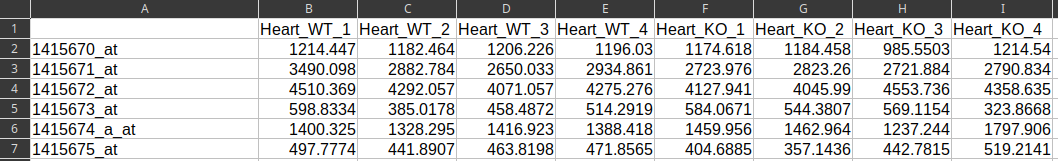

<br>

Take a look at the file first in a text editor or on the command line to verify its structure.



Based on the names, we can guess that we have gene expression values for heart tissue of two types: "WT" (wildtype) and "KO" (knock out), and four replicates for each condition:

Heart_WT_1 Heart_WT_2 Heart_WT_3 Heart_WT_4 Heart_KO_1 Heart_KO_2 Heart_KO_3 Heart_KO_4

In [ ]:
df = pd.read_csv("data/mouse_heart_gene_expresssion.tsv", sep='\t')
df.head()

<br>

[Back to ToC](#toc)


### Selecting/Filtering dataframes <a id='31'></a>

Lets read the dataframe again.

In [ ]:
column_names = ["gene", "Heart_WT_1", "Heart_WT_2", "Heart_WT_3", "Heart_WT_4", "Heart_KO_1", "Heart_KO_2", "Heart_KO_3", "Heart_KO_4"]
df = pd.read_csv("GSE41558_series_matrix_no_header.tsv", sep='\t', header=None)
df.columns = column_names
df.set_index('gene', inplace=True) 
df.head()

And filter it based on some criteria that we may be interested in. 

For example say we want to find genes that have at least 250 reads in the 'Heart_WT_1' sample. We would do it like this: first we find the genes that satisfy the condition:

In [ ]:
myslice = df['Heart_WT_1']>250
print(type(myslice))

In [ ]:
myslice.head()

Applying the `>` operator returns a boolean Series with the result of the function on every element of the Series. Then, to select the corresponding elements of the dataframe, we use the boolean Series to slice the original dataframe:

In [ ]:
mymysteriousobj = df[df['Heart_WT_1']>250]
print(type(mymysteriousobj))

In [ ]:
df[df['Heart_WT_1']>250].head()

We can design more complicated filters, as below, we select genes that have more than 250 reads in WT samples, less than 150 in all KO samples:

In [ ]:
df[(df['Heart_WT_1']>250) &
   (df['Heart_WT_2']>250) &
   (df['Heart_WT_3']>250) &
   (df['Heart_WT_4']>250) &
   (df['Heart_KO_1']<150) &
   (df['Heart_KO_2']<150) &
   (df['Heart_KO_3']<150) &
   (df['Heart_KO_4']<150)]

We can also slice the result of filtering. For example, let's say that we want to extract the genes with more than 250 reads in the first WT and less than 50 reads the first KO sample but then also only keep these two columns of the data.

In [ ]:
df[(df['Heart_WT_1']>250) & (df['Heart_KO_1']<50)][ ['Heart_WT_1', 'Heart_KO_1'] ]

We can very easily keep just the names of these genes in a list:

In [ ]:
list_of_genes = list(df[(df['Heart_WT_1']>250) & (df['Heart_KO_1']<50)].index)
print(list_of_genes)

A very powerful feature is that we can apply filters on all columns and rows at the same time:

In [ ]:
df>1000

Of course, if we try to make a data frame based on this filter we will have a dataframe with a lot of NaN (Not a Number) entries:

In [ ]:
df[df>1000]

<br>

[Back to ToC](#toc)

### Sorting operations on dataframes <a id='32'></a>

DataFrames can be sorted on one or more specific column(s) using `sort_values():

In [ ]:
df.sort_values('Heart_WT_1', ascending=False).head()

Or we can sort by index :

In [ ]:
df.sort_index(ascending=True).head()

Finding the minimum value in each column. Note the `axis` parameter. This gives the dimension along which values are compared. `axis=0` indicates that the comparison is across rows and there looping over all index values in all other dimensions. In this case, for each column we got a value.

In [ ]:
df.min(axis=0)

Let's now find the min in each row (in this case for each gene), over all columns (samples):

In [ ]:
df.min(axis=1).head()

Maybe what we want is not the minimum value but the index at which it is found: 

In [ ]:
df.idxmin(axis=1).head()

Or maybe we want both:

In [ ]:
def my_filter(df):
    return df.idxmin(axis=0),df.min(axis=0)
    
df.apply(my_filter)

In [ ]:
# Finding the gene with mininum expression, but on the first 3 rows only
df[0:3].apply(my_filter)

Note the application of a function that generates tuples of (index (gene name) - value). If the minimum occurs multiple times, only the first index where it occurs is returned.

<br>

[Back to ToC](#toc)

###  Extending a dataframe by adding new columns <a id='33'></a>

We can set up a new dataframe and concatenate it to the original dataframe using the `concat` method:

In [ ]:
dfavg = pd.DataFrame()
dfavg['Heart_WT_avg'] = (df['Heart_WT_1']+df['Heart_WT_2']+df['Heart_WT_3']+df['Heart_WT_4'])/4
dfavg['Heart_KO_avg'] = (df['Heart_KO_1']+df['Heart_KO_2']+df['Heart_KO_3']+df['Heart_KO_4'])/4
dfavg.head()

In [ ]:
dfavg = pd.DataFrame()
dfavg['Heart_WT_avg'] = (df['Heart_WT_1']+df['Heart_WT_2']+df['Heart_WT_3']+df['Heart_WT_4'])/4
dfavg['Heart_KO_avg'] = (df['Heart_KO_1']+df['Heart_KO_2']+df['Heart_KO_3']+df['Heart_KO_4'])/4

dfall = pd.concat([df, dfavg], axis=1)
dfall.head()

Or we can modify the original dataframe in place, adding columns to it:

In [ ]:
df['Heart_WT_avg'] = (df['Heart_WT_1']+df['Heart_WT_2']+df['Heart_WT_3']+df['Heart_WT_4'])/4
df['Heart_KO_avg'] = (df['Heart_KO_1']+df['Heart_KO_2']+df['Heart_KO_3']+df['Heart_KO_4'])/4
df.head()

<br>

[Back to ToC](#toc)

### Use of numpy functions with pandas dataframes <a id='34'></a>


Let's say we want to calculate the log average expression value. We could do it like this:

In [ ]:
import numpy as np

df['log2_Heart_KO_avg'] = np.log2(df['Heart_KO_avg'])
df['log2_Heart_WT_avg'] = np.log2(df['Heart_WT_avg'])
df.head()

And now we can calculate the log fold-change in expression between conditions:

In [ ]:
df['log2FC'] = df['log2_Heart_KO_avg'] - df['log2_Heart_WT_avg']
df.head()

But now we realized that we didn't keep track of how we calculated the fold change (which was the numerator/denominator). We can fix this:

In [ ]:
df['log2FC_KO_WT'] = df['log2_Heart_KO_avg'] - df['log2_Heart_WT_avg']
df.head()

And then we have to remove the old column, with the `.drop()` method:

In [ ]:
df.drop('log2FC', axis=1, inplace=True)
df.head()

Finally, let's add one more column with the average expression across all samples

In [ ]:
df['log2Avg'] = np.log2((df['Heart_KO_avg']+df['Heart_WT_avg'])/2)
df.head()

<br>

[Back to ToC](#toc)

### Merge and join DataFrames <a id='35'></a>

The [`merge()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) and [`join()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) methods allow to combine DataFrames, linking their rows based on their keys. 

Here's how we construct a dataframe from a dictionary data structure, where dictionary keys are treated as column names, list of values associated with a key is treated as list of elements in the corresponding column, and rows are contructed based on the index of elements within the list of elements in the column (note however that all columns should have the same length):

In [ ]:
df1 = pd.DataFrame({
    'key': ['b','b','a','c','a','a','b'], 
    'data1': range(7)
})
df1

In [ ]:
df2 = pd.DataFrame({
    'key': ['a','b','d'], 
    'data2': range(3)
})
df2

Let's merge the two data frames, with the default application of the `merge()` function:

In [ ]:
pd.merge(df1, df2)

How has python interpreted our call to `merge`?

1. It has assumed that we want to merge on the basis of the common `key` column.
2. It has identified the values of `key` which occur in both dataframes.
3. It has generated a dataframe with all combinations of rows from dataframes 1 and 2 that are 
   associated with a particular key value.

We can be more precise by specifying how to merge the dataframes, using the **on** option:

In [ ]:
pd.merge(df1, df2, on='key')

By default, merge performs an 'inner' operation, taking the intersection of the key sets. However, we can specify the way we want to merge through options like 'outer', 'left', 'right'. This determines which set of keys to consider (the union of the two sets, all of those that occur in df1, all of those that occur in df2). Missing values show up as NaN.

In [ ]:
pd.merge(df1, df2, on='key', how='outer')

Merging can also be done based on index. For this lets use our mouse heart gene expression dataset we used earlier:

In [ ]:
df.head()

Let's create two data frames, one containing the data for the WT and the other for the KO:

In [ ]:
wt_cols = [col for col in df.columns if 'WT' in col and 'avg' not in col and 'log' not in col]
ko_cols = [col for col in df.columns if 'KO' in col and 'avg' not in col and 'log' not in col]
df_WT = df[wt_cols]
df_KO = df[ko_cols]
print(df_WT.head())
print(df_KO.head())

Let's merge these frames based on the index:

In [ ]:
merged_df = pd.merge(df_WT, df_KO, left_index=True, right_index=True)
merged_df.head()

<br>

### Cross-tabulated tables <a id='36'></a>

Cross-tabulated tables for two (or more) columns (factors) of a DataFrame can be created with **`pd.crosstab()`**.

In [ ]:
# Load data from disk.
df = pd.read_csv("data/titanic.csv")

# Create a cross-tabulated table giving the counts of survivors/non-survivor per passenger class.
pd.crosstab(df.Pclass, df.Survived)

<br>

[Back to ToC](#toc)


### Plotting with pandas and matplotlib <a id='37'></a>

Now let's explore our data a bit. First, a matrix of scatter plots for all pairwise sample comparisons (note: the cell below can take 10-20 seconds to compute):

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

scatter_matrix(np.log2(df.iloc[:,0:8]), figsize=(12, 12), diagonal='kde')
plt.show() # this instruction makes the plot appear.

The so-called M-A plot of expression change between KO and WT relative to average expression in these two conditions:

In [ ]:
pd.DataFrame(df[['log2FC_KO_WT', 'log2Avg']]).plot(x='log2Avg', y='log2FC_KO_WT', kind='scatter')
plt.show()

Histogram of the log fold changes

In [ ]:
df['log2FC_KO_WT'].hist(bins=100)
plt.show()

Or we can check how well the expression changes fit a gaussian distribution

In [ ]:
import scipy.stats as stats

# Best fit of data with a normal law
(mu, sigma) = stats.norm.fit(df['log2FC_KO_WT'])

# The histogram of the data
n, bins, patches = plt.hist(df['log2FC_KO_WT'], 60, density=1, facecolor='blue', alpha=1)

y = stats.norm.pdf( bins, loc = mu , scale = sigma )
# Add a 'best fit' line
l = plt.plot(bins, y, 'r--', linewidth=2)

# plot
plt.xlabel('Log2 fold change')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ log2 fold change:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)

plt.show()

<br>

[Back to ToC](#toc)